In [1]:
%reset -f
# new

In [87]:
# Import packages
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Change matplotlib backend
%matplotlib notebook
#%matplotlib inline
# Import slider package
from matplotlib.widgets import Slider
#%matplotlib widget

In [88]:
# Fermi-Dirac Distribution
def fermi(E: float, E_f: float, T: float) -> float:
    k_b = 8.617 * (10**-5) # eV/K
    return 1/(np.exp((E - E_f)/(k_b * T)) + 1)

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

In [89]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

<IPython.core.display.Javascript object>


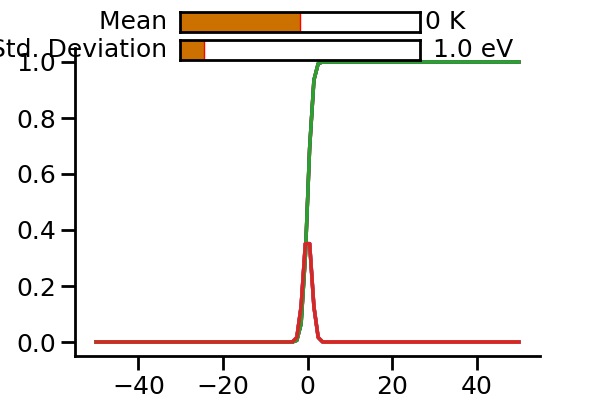

In [90]:
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

In [91]:
# Temperature values
#T = np.linspace(100, 1000, 10)
x = np.linspace(-50,50,100)
mu = 0
sigma = 1
y = np.linspace(0,0,100)
z = np.linspace(0,0,100)

In [92]:
# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', 10)

In [95]:
# Plot F-D data
#for i in range(len(T)):
 #   x = np.linspace(0, 1, 100)
  #  y = fermi(x, 0.5, T[i])
for i in range(len(x)):
    y[i] = normdist(x[i],mu,sigma)
    z[i] = normdensity(x[i],mu,sigma)
ax.plot(x, y, color="red", linewidth=2.5)
ax.plot(x, z, color="blue", linewidth=2.5)


In [50]:
# Add legend
labels = ['100 K', '200 K', '300 K', '400 K', '500 K', '600 K', 
          '700 K', '800 K', '900 K', '1000 K']
ax.legend(labels, bbox_to_anchor=(1.05, -0.1), loc='lower left', 
          frameon=False, labelspacing=0.2)


<IPython.core.display.Javascript object>


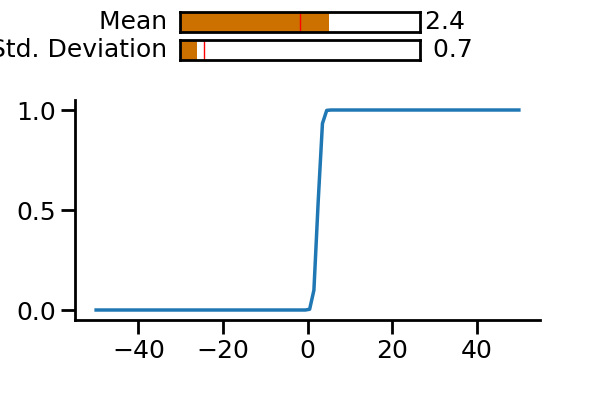

In [107]:
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))

# Create main axis
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2, top=0.75)

In [108]:
# Create axes for sliders
ax_Ef = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_Ef.spines['top'].set_visible(True)
ax_Ef.spines['right'].set_visible(True)
ax_T = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_T.spines['top'].set_visible(True)
ax_T.spines['right'].set_visible(True)

In [109]:
# Create sliders
s_Ef = Slider(ax=ax_Ef, label='Std. Deviation ', valmin=0.001, valmax=10.0,
              valinit=1, valfmt=' %1.1f ', facecolor='#cc7000')
s_T = Slider(ax=ax_T, label='Mean ', valmin=-10, valmax=10, 
             valinit=0, valfmt='%1.1f ', facecolor='#cc7000')

In [110]:
# Plot default data
#x = np.linspace(-0, 1, 100)
Ef_0 = 0.5
T_0 = 100
#y = fermi(x, Ef_0, T_0)
#f_d, = ax.plot(x, y, linewidth=2.5)

x = np.linspace(-50,50,100)
mu = 0
sigma = 1
for i in range(len(x)):
    y[i] = normdist(x[i],mu,sigma)
f_d, = ax.plot(x, y, linewidth=2.5)

In [111]:
# Update values
def update(val):
    Ef = s_Ef.val
    T = s_T.val
#    f_d.set_data(x, fermi(x, Ef, T))
    for i in range(len(x)):
        y[i] = normdist(x[i],T,Ef)
    f_d.set_data(x, y)
    fig.canvas.draw_idle()
s_Ef.on_changed(update)
s_T.on_changed(update)

0

In [55]:
x = np.linspace(-50,50,100)

In [56]:
x

array([-50.        , -48.98989899, -47.97979798, -46.96969697,
       -45.95959596, -44.94949495, -43.93939394, -42.92929293,
       -41.91919192, -40.90909091, -39.8989899 , -38.88888889,
       -37.87878788, -36.86868687, -35.85858586, -34.84848485,
       -33.83838384, -32.82828283, -31.81818182, -30.80808081,
       -29.7979798 , -28.78787879, -27.77777778, -26.76767677,
       -25.75757576, -24.74747475, -23.73737374, -22.72727273,
       -21.71717172, -20.70707071, -19.6969697 , -18.68686869,
       -17.67676768, -16.66666667, -15.65656566, -14.64646465,
       -13.63636364, -12.62626263, -11.61616162, -10.60606061,
        -9.5959596 ,  -8.58585859,  -7.57575758,  -6.56565657,
        -5.55555556,  -4.54545455,  -3.53535354,  -2.52525253,
        -1.51515152,  -0.50505051,   0.50505051,   1.51515152,
         2.52525253,   3.53535354,   4.54545455,   5.55555556,
         6.56565657,   7.57575758,   8.58585859,   9.5959596 ,
        10.60606061,  11.61616162,  12.62626263,  13.63